<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_HW5_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIP**

**HW5**

**Q4**

---

*Ali Safarpoor Dehkordi*

*99210301*

---

---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.signal as sig
import cv2
import cv2 as cv

In [2]:
from matplotlib.pyplot import imshow
%matplotlib inline

## read file

In [3]:
!wget https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip

--2022-07-09 19:49:46--  https://www.dropbox.com/s/l5lg0yrs1k7ydmb/HW5.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l5lg0yrs1k7ydmb/HW5.zip [following]
--2022-07-09 19:49:46--  https://www.dropbox.com/s/raw/l5lg0yrs1k7ydmb/HW5.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0a64b674a00c72dd0fca5d84d.dl.dropboxusercontent.com/cd/0/inline/BowcHo6R8Bc1qmBzWfYOm7WIqzfToNnW41IDnUqWOt7dEWjD0MrlJMIfO98YpzJXTAFr9N68NdjPmZEhJcDvOW_B13NMh18YY_CGOzSK8veOIqoi5jSKYLQC6GdxWuNmqqBrLMtNG7LYTsS_lVM1y61a2JGipM_cYF7dmR5ZKmdwCg/file# [following]
--2022-07-09 19:49:46--  https://ucc0a64b674a00c72dd0fca5d84d.dl.dropboxusercontent.com/cd/0/inline/BowcHo6R8Bc1qmBzWfYOm7WIqzfToNnW41IDnUqWOt7dEWjD0MrlJMIfO98YpzJXTAFr9N68NdjPmZEhJcD

In [4]:
import zipfile
zip = zipfile.ZipFile('HW5.zip')
zip.extractall()

In [5]:
%cd HW5
!ls

/content/HW5
blood_cell.jpg	coins.jpg  images  old_video.mp4


In [6]:
name = "old_video.mp4"
vidcap = cv2.VideoCapture(name)
success,image = vidcap.read()
count = 0
originals = []
while success:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    originals.append(gray)
    success,image = vidcap.read()

In [7]:
originals = np.array(originals[:])
imgs = originals[:]
imgs = np.array(imgs)

## start 0.1

In [8]:
# def q4_first_function(img):

#     image = cv2.equalizeHist(img)
    
#     image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
#     dst = cv2.fastNlMeansDenoisingColored(image,None,20,20,21,30)

#     image = dst[:,:,0]

#     sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
#     image = cv2.filter2D(dst[:,:,0], -1, sharpen_kernel)
    
#     return image

In [9]:
imgs = originals[:]
imgs = np.array(imgs)

In [10]:
# [2:-2,265:-270]

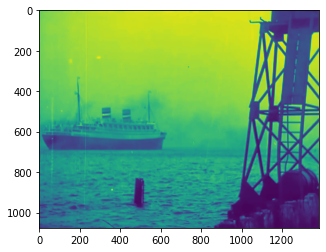

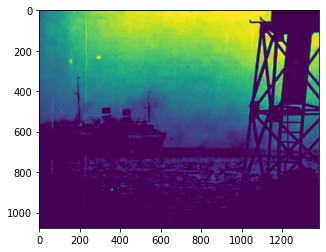

In [11]:
im = np.copy(imgs[138][2:-2,265:-270])
imshow(im);plt.show()
im[im<150]=0
im = cv2.equalizeHist(im)
imshow(im);plt.show()
# sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
# im = cv2.filter2D(im, -1, sharpen_kernel)
# imshow(im);plt.show()

In [17]:
ims = []
for i_ in tqdm(range(len(imgs))):
    im = np.copy(imgs[i_][2:-2,265:-270])
    edges = cv2.Canny(im,90,20,apertureSize = 3, L2gradient = True)
    x = np.zeros(im.shape)
    for i in range(5,-5+len(im)):
        for j in range(5,-5+len(im[0])):
            c = 0
            if edges[i][j]>0 and edges[i-1][j]>0 and edges[i+1][j]>0 : #and edges[i+2][j]==0 and edges[i-2][j]==0:
                x[i][j] = 255
                im[i][j-1] = min(im[i][j],im[i][j-1],im[i][j-2],im[i][j+1],im[i][j-3])
                im[i][j] = min(im[i][j+1],im[i][j-1],im[i][j],im[i][j+2],im[i][j-2])

    ret, thresh = cv2.threshold(im, im.max()-30 , 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    lst = []
    for c in contours:
        area = cv.contourArea(c)
        if area > 10 and area<1000:
            lst.append(c)
    remain_index = []
    ind = 0
    for c in lst:   
        flag = True
        z = 0 
        for x in c:
            j,i=x[0]
            if im[i][j]>100:
                if im[i-1][j] < 100 or im[i][j-1] < 100 :
                    z+=1
                if z>3:
                    flag = False
                    break
        if flag:
            remain_index.append(ind)
        ind+=1
    raw = np.zeros(im.shape)
    raw = cv.drawContours(raw, lst, -1, (255), -1)
    newlst = []
    for i in remain_index:
        newlst.append(lst[i])
    lst = newlst
    raw = np.zeros(im.shape)
    raw = cv.drawContours(raw, lst, -1, (255), -1)
    for i in range(5,-5+len(im)):
        for j in range(5,-5+len(im[0])):
            if raw[i][j]>0:
                
                if  im[i][j]>100 and im[i-1][j]>140 and im[i][j-1]>140:
                    im[i][j] = min(im[i-1][j] , im[i][j-1])
                    raw[i][j] = 255
    img = np.copy(imgs[i_])
    img[2:-2,265:-270] = im
    imgs.append(img[:])

100%|██████████| 600/600 [31:17<00:00,  3.13s/it]


In [13]:
# import pickle
# with open('newer old.pkl', 'wb') as db_file:
#     pickle.dump(ims,db_file)

In [14]:
# with open('newer old.pkl','rb') as f: arrayname1 = pickle.load(f)

In [15]:
# arrayname1 = np.array(arrayname1)
# arrayname1.shape

(600, 1080, 1920)

In [ ]:
import os
from moviepy.video.io import ImageSequenceClip

fps=25

out2 = np.array(ims)
out3 = [np.array([np.array(i).transpose(),np.array(i).transpose(),np.array(i).transpose()]).transpose() for i in out2]
print(len(out3))
clip = ImageSequenceClip.ImageSequenceClip(out3, fps=fps)
clip.write_videofile('aaa.mp4')